# Baseball Databank 1871 to 2015 (Exploration)

This will be quite a step up from what we have done so far in terms of overall size of data and the amount of features. Additionally, we will explore how to download multiple files and discover the relationships between different tables, identifiers, etc. 

The goal of this project is to give you a step by step guide from ingesting a dataset (multiple files) all the way to telling a concise story highlighting some of your findings!

## The beauty of Kaggle

Kaggle is a very useful open source website with a variety of different data sets available for free! For this project I will be using the dataset here: https://www.kaggle.com/datasets/open-source-sports/baseball-databank?resource=download

### Ingest Dataset into Jupyter Notebook

1. Press Download (You will download a .zip file)
2. Unzip it
3. Upload the files into your Jupyter Notebook in the directory where your .ipynb file is

### How to access these files

With Kaggle datasets (or datasets in general), it is smart to read the documentation provided which may help describe table contents, column names, and other important information. Given what I have gathered, from the documentation provided, I would assume the first table we should look at is the Master table. 

In [123]:
import pandas as pd
import numpy as np

In [5]:
master_table = pd.read_csv("Master.csv")
master_table.head() #By default shows the top 5 records in the dataframe

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


This is only one of the tables, but being named "Master" would indicate that it is most likely a good place to start. Now let's explore this dataframe a bit.

## Common ways to systematically examine your data in order to familiarize yourself

A common first step with a new dataset is to display all of the column names and their data types.

In [6]:
master_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      18846 non-null  object 
 1   birthYear     18703 non-null  float64
 2   birthMonth    18531 non-null  float64
 3   birthDay      18382 non-null  float64
 4   birthCountry  18773 non-null  object 
 5   birthState    18220 non-null  object 
 6   birthCity     18647 non-null  object 
 7   deathYear     9336 non-null   float64
 8   deathMonth    9335 non-null   float64
 9   deathDay      9334 non-null   float64
 10  deathCountry  9329 non-null   object 
 11  deathState    9277 non-null   object 
 12  deathCity     9325 non-null   object 
 13  nameFirst     18807 non-null  object 
 14  nameLast      18846 non-null  object 
 15  nameGiven     18807 non-null  object 
 16  weight        17975 non-null  float64
 17  height        18041 non-null  float64
 18  bats          17655 non-nu

This is a great first look at a summary of this dataset. Now let's show some basic statistics.

In [7]:
master_table.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,18703.000000,18531.000000,18382.000000,9336.000000,9335.000000,9334.000000,17975.000000,18041.000000
mean,1930.664118,6.627327,15.609020,1963.850364,6.484092,15.570281,185.980862,72.255640
std,41.229079,3.467110,8.748942,31.506369,3.528685,8.778580,21.226988,2.598983
min,1820.000000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000
25%,1894.000000,4.000000,8.000000,1942.000000,3.000000,8.000000,170.000000,71.000000
50%,1936.000000,7.000000,16.000000,1966.000000,6.000000,15.000000,185.000000,72.000000
75%,1968.000000,10.000000,23.000000,1989.000000,10.000000,23.000000,200.000000,74.000000
max,1995.000000,12.000000,31.000000,2016.000000,12.000000,31.000000,320.000000,83.000000


By default, .describe() only analyzes numeric columns but if you are interested in relevant statistics for non-numerical columns, you can include them.

In [8]:
master_table.describe(include=object)

,playerID,birthCountry,birthState,birthCity,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,bats,throws,debut,finalGame,retroID,bbrefID
count,18846,18773,18220,18647,9329,9277,9325,18807,18846,18807,17655,17868,18653,18653,18792,18845
unique,18846,52,245,4713,23,92,2553,2312,9713,12436,3,2,10036,9028,18792,18845
top,aardsda01,USA,CA,Chicago,USA,CA,Philadelphia,Bill,Smith,John Joseph,R,R,1884-05-01,2015-10-04,aardd001,aardsda01
freq,1,16504,2160,375,9115,1075,239,549,151,74,11615,14272,36,501,1,1


You can already see some pretty cool information from this dataset just from these few lines of code!

#### A crucial piece of information here is that there are 18846 playerID records and 18846 unique playerIDs (No duplicates)! When we get to more advanced database topics you will understand why this is so important! But you will frequently be checking for duplicate records in key columns when analyzing datasets.

Some interesting notes from the 2 cells above:

1. The state where most players were born was California but the most frequent city of player birth was in Illinois (Chicago)!

2. Mean weight of MLB players from 1871 to 2015 is 185.98 pounds

3. 549 players were names Bill in this time frame

There are so many interesting things that can be extracted just from these two simple views. It's also interesting to think about how you can further examine some of these "interesting notes" and how you can extract more useful information with a deeper dive!

## Access Elements of a Dataframe

When you have larger dataframes, obviously you need more efficient ways to sift through the data and extract what you want and need!

### Indexing Operator

Let's focus on that birthCity column. First we can isolate that column as shown below:

In [10]:
master_table['birthCity']

0               Denver
1               Mobile
2               Mobile
3               Orange
4           Palm Beach
             ...      
18841    San Francisco
18842        San Mateo
18843          Holland
18844        St. Louis
18845            Monee
Name: birthCity, Length: 18846, dtype: object

This doesn't tell us very much but let's use some dataframe functions to dive in.

In [11]:
# value_counts() gives the number of occurences for each city in this column
master_table['birthCity'].value_counts()

Chicago         375
Philadelphia    355
St. Louis       298
New York        267
Brooklyn        240
               ... 
South Haven       1
Monocacy          1
Newmarket         1
Hoopeston         1
Monee             1
Name: birthCity, Length: 4713, dtype: int64

In [16]:
#combining isnull() and sum() counts the number of entries that are null in a given column
master_table['birthCity'].isnull().sum()

199

You're beginning to slowly piece together some useful information about this dataset. Let's continue with some other ways to access dataframe elements.

### .loc method

The .loc method accesses data elements in a dataframe using labels. This is very useful when extracting data using conditional statements.

Given what we know from above, Chicago is the city with the most MLB player births. Let's pull only 

In [26]:
master_table.loc[master_table['birthCity']=='Chicago']

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
27,aberscl01,1921.0,8.0,28.0,USA,IL,Chicago,1973.0,6.0,23.0,...,Aberson,Clifford Alexander,200.0,72.0,R,R,1947-07-18,1949-05-09,aberc101,aberscl01
98,adducji01,1959.0,8.0,9.0,USA,IL,Chicago,NaN,NaN,NaN,...,Adduci,James David,200.0,77.0,L,L,1983-09-12,1989-07-26,adduj001,adducji01
109,adkinst01,1964.0,10.0,26.0,USA,IL,Chicago,NaN,NaN,NaN,...,Adkins,Steven Thomas,210.0,78.0,R,L,1990-09-12,1990-10-03,adkis001,adkinst01
455,arrigge01,1941.0,6.0,12.0,USA,IL,Chicago,NaN,NaN,NaN,...,Arrigo,Gerald William,185.0,73.0,L,L,1961-06-12,1970-06-05,arrig101,arrigge01
478,asmusto01,1878.0,9.0,26.0,USA,IL,Chicago,1963.0,8.0,21.0,...,Asmussen,Thomas William,NaN,71.0,NaN,R,1907-08-10,1907-08-19,asmut101,asmusto01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18724,younger02,1969.0,7.0,8.0,USA,IL,Chicago,NaN,NaN,NaN,...,Young,Ernest Wesley,190.0,73.0,R,R,1994-05-17,2004-09-24,youne002,younger02
18795,zeisema01,1888.0,9.0,25.0,USA,IL,Chicago,1942.0,6.0,10.0,...,Zieser,Mathias John,170.0,70.0,R,R,1914-04-27,1914-05-11,zeism101,zeisema01
18801,zickbo01,1927.0,4.0,26.0,USA,IL,Chicago,NaN,NaN,NaN,...,Zick,Robert George,168.0,72.0,L,R,1954-05-02,1954-09-06,zickb101,zickbo01
18804,zieglge01,1872.0,NaN,NaN,USA,IL,Chicago,1916.0,7.0,22.0,...,Ziegler,George J.,150.0,68.0,NaN,NaN,1890-06-19,1890-06-19,ziegg101,zieglge01


Now what if we want only players born in Chicago who were also born after 1958. Yes, you can incude multiple conditions using the .loc method!

In [29]:
master_table.loc[(master_table['birthCity']=='Chicago') & (master_table['birthYear'] > 1956)]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
98,adducji01,1959.0,8.0,9.0,USA,IL,Chicago,NaN,NaN,NaN,...,Adduci,James David,200.0,77.0,L,L,1983-09-12,1989-07-26,adduj001,adducji01
109,adkinst01,1964.0,10.0,26.0,USA,IL,Chicago,NaN,NaN,NaN,...,Adkins,Steven Thomas,210.0,78.0,R,L,1990-09-12,1990-10-03,adkis001,adkinst01
1519,bolsimi01,1988.0,1.0,29.0,USA,IL,Chicago,NaN,NaN,NaN,...,Bolsinger,Michael P.,215.0,73.0,R,R,2014-04-14,2015-09-30,bolsm001,bolsimi01
1976,brownem01,1974.0,12.0,29.0,USA,IL,Chicago,NaN,NaN,NaN,...,Brown,Emil Quincy,195.0,74.0,R,R,1997-04-03,2009-06-06,browe001,brownem01
2606,carrema01,1963.0,7.0,19.0,USA,IL,Chicago,NaN,NaN,NaN,...,Carreon,Mark Steven,170.0,72.0,R,L,1987-09-08,1996-08-23,carrm001,carrema01
2609,carrice01,1984.0,4.0,29.0,USA,IL,Chicago,NaN,NaN,NaN,...,Carrillo,Cesar,170.0,75.0,R,R,2009-08-13,2009-08-23,carrc002,carrice01
2814,chambwe01,1966.0,4.0,13.0,USA,IL,Chicago,NaN,NaN,NaN,...,Chamberlain,Wesley Polk,210.0,74.0,R,R,1990-08-31,1995-06-07,chamw001,chambwe01
3153,coganto01,1976.0,12.0,21.0,USA,IL,Chicago,NaN,NaN,NaN,...,Cogan,Anthony Michael,205.0,74.0,L,L,2001-04-02,2001-08-12,cogat001,coganto01
3229,collilo01,1973.0,8.0,21.0,USA,IL,Chicago,NaN,NaN,NaN,...,Collier,Louis Keith,170.0,70.0,R,R,1997-06-28,2004-09-30,colll001,collilo01
3840,dalesma01,1968.0,5.0,14.0,USA,IL,Chicago,NaN,NaN,NaN,...,Dalesandro,Mark Anthony,185.0,72.0,R,R,1994-06-06,2001-08-10,dalem001,dalesma01


Let's take it a step further and print out a count of how many players fit these criteria.

In [37]:
number_of_players = len(master_table.loc[(master_table['birthCity']=='Chicago') & (master_table['birthYear'] > 1956)])
print(f"There are {number_of_players} born in Chicago after 1956!")

There are 47 born in Chicago after 1956!


### .iloc method

The iloc method accesses data elements using positional index.

Let's say we want the first 10 rows of the dataframe.

In [40]:
master_table.iloc[0:10]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
5,abadfe01,1985.0,12.0,17.0,D.R.,La Romana,La Romana,NaN,NaN,NaN,...,Abad,Fernando Antonio,220.0,73.0,L,L,2010-07-28,2015-10-03,abadf001,abadfe01
6,abadijo01,1854.0,11.0,4.0,USA,PA,Philadelphia,1905.0,5.0,17.0,...,Abadie,John W.,192.0,72.0,R,R,1875-04-26,1875-06-10,abadj101,abadijo01
7,abbated01,1877.0,4.0,15.0,USA,PA,Latrobe,1957.0,1.0,6.0,...,Abbaticchio,Edward James,170.0,71.0,R,R,1897-09-04,1910-09-15,abbae101,abbated01
8,abbeybe01,1869.0,11.0,11.0,USA,VT,Essex,1962.0,6.0,11.0,...,Abbey,Bert Wood,175.0,71.0,R,R,1892-06-14,1896-09-23,abbeb101,abbeybe01
9,abbeych01,1866.0,10.0,14.0,USA,NE,Falls City,1926.0,4.0,27.0,...,Abbey,Charles S.,169.0,68.0,L,L,1893-08-16,1897-08-19,abbec101,abbeych01


How about just a quick printout of the row at index 3.

In [42]:
print(master_table.iloc[3])

playerID              aasedo01
birthYear               1954.0
birthMonth                 9.0
birthDay                   8.0
birthCountry               USA
birthState                  CA
birthCity               Orange
deathYear                  NaN
deathMonth                 NaN
deathDay                   NaN
deathCountry               NaN
deathState                 NaN
deathCity                  NaN
nameFirst                  Don
nameLast                  Aase
nameGiven       Donald William
weight                   190.0
height                    75.0
bats                         R
throws                       R
debut               1977-07-26
finalGame           1990-10-03
retroID               aased001
bbrefID               aasedo01
Name: 3, dtype: object


The individual use cases of these two methods will be expanded upon in this project and throughtout the remainder of the curriculum.

## Combining Datasets

Before we get much use from this entire dataset, we need to bring in another csv file with some more useful information. Based on the documentation from Kaggle, we can get a lot of useful hitting statistics from the batting.csv

In [44]:
batting_table = pd.read_csv("batting.csv")
batting_table.head() 

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


As we can see here, "playerID" is a common column name amongst the Master Table and the Batting Table. This is the unique identifier for each player and serves as the "Primary Key" of the Master Table. You will learn more about primary and foreign keys in the future. For now, think of this as the "link" between a player in the master table and their batting stats in the batting table.

### Let's Merge the Tables

In [50]:
pd.merge(master_table, batting_table, left_on="playerID", right_on="playerID")
# This line says join tables master_table and batting_table where playerID from master_table
# matches playerID from batting_table
# This is similar to a "join" in SQL which we will learn a lot more about in the future

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101327,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,...,5.0,1.0,NaN,11.0,NaN,NaN,1.0,1.0,NaN,NaN
101328,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,...,95.0,21.0,NaN,46.0,68.0,NaN,1.0,10.0,NaN,NaN
101329,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,...,94.0,24.0,NaN,67.0,65.0,NaN,2.0,18.0,NaN,NaN
101330,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,...,8.0,0.0,NaN,4.0,6.0,NaN,0.0,2.0,NaN,NaN


As you can see, this line of code now gives us a row for each playerID with the columns from the Master table AND the columns from the Batting Table! Pretty cool!

Now let's extract some information using this merged table. Let's start by assigning this merge to a new Dataframe variable.

In [51]:
dataframe2 = pd.merge(master_table, batting_table, left_on="playerID", right_on="playerID")

We can now use some new techniques to extract some useful information and begin some data processing.

## Grouping and Aggregating Data

Let's first use our handy describe() function to quickly examine this new dataframe.

In [52]:
dataframe2.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height,yearID,stint,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,101148.000000,100764.000000,100419.000000,43672.000000,43671.000000,43669.000000,100104.000000,100170.000000,101332.000000,101332.000000,...,95759.000000,94883.000000,72729.000000,96183.000000,88345.000000,59620.000000,93373.000000,89845.000000,60151.000000,70075.000000
mean,1935.423241,6.653934,15.671666,1968.182543,6.515514,15.523163,187.316681,72.406828,1963.506533,1.077567,...,17.965163,3.158184,1.324025,13.811484,21.629849,1.213234,1.113395,2.457900,1.150122,3.210032
std,38.153059,3.454927,8.735474,30.945391,3.538254,8.803910,21.057995,2.533496,38.628278,0.283676,...,26.756514,7.922994,2.838196,21.092775,28.432978,2.894918,2.320660,4.347818,2.023981,4.835881
min,1831.000000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000,1871.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1905.000000,4.000000,8.000000,1947.000000,3.000000,8.000000,175.000000,71.000000,1933.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1945.000000,7.000000,16.000000,1971.000000,7.000000,15.000000,185.000000,72.000000,1972.000000,1.000000,...,4.000000,0.000000,0.000000,3.000000,10.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1968.000000,10.000000,23.000000,1994.000000,10.000000,23.000000,200.000000,74.000000,1997.000000,1.000000,...,27.000000,2.000000,1.000000,20.000000,30.000000,1.000000,1.000000,3.000000,2.000000,5.000000
max,1995.000000,12.000000,31.000000,2016.000000,12.000000,31.000000,320.000000,83.000000,2015.000000,5.000000,...,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


Let's say we want to find the players with the most strikeouts in their career. First let's introduce the groupby() function. This following line aggregates by playerID and takes the sum of their Strikeouts (SO). 

In [55]:
dataframe2.groupby("playerID")["SO"].sum()

playerID
aardsda01       2.0
aaronha01    1383.0
aaronto01     145.0
aasedo01        3.0
abadan01        5.0
              ...  
zupofr01        6.0
zuvelpa01      50.0
zuverge01      39.0
zwilldu01     139.0
zychto01        0.0
Name: SO, Length: 18659, dtype: float64

Now we want the top 10 players with the most strikeouts. Let's introduce the sort_values() function.

In [57]:
dataframe2.groupby("playerID")["SO"].sum().sort_values(ascending=False).head(10)

playerID
jacksre01    2597.0
thomeji01    2548.0
dunnad01     2379.0
sosasa01     2306.0
rodrial01    2220.0
galaran01    2003.0
cansejo01    1942.0
stargwi01    1936.0
camermi01    1901.0
schmimi01    1883.0
Name: SO, dtype: float64

Now as you have noticed, the playerIds themselves aren't very useful. So let's include a printout of the player's names so we can actually get something readable out of this.

In [93]:
top10_so_df = dataframe2.groupby("playerID")["SO"].sum().sort_values(ascending=False).head(10)
top10_list=top10_so_df
top10_list = top10_list.keys()
top10_list

Index(['jacksre01', 'thomeji01', 'dunnad01', 'sosasa01', 'rodrial01',
       'galaran01', 'cansejo01', 'stargwi01', 'camermi01', 'schmimi01'],
      dtype='object', name='playerID')

We have now extracted the 10 playerIds into an array. Let's refer back to the master table to extract the player names.

In [102]:
player_extractor = master_table.loc[master_table["playerID"].isin(top10_list)]
player_extractor = player_extractor[["playerID","nameFirst","nameLast"]]
player_extractor

,playerID,nameFirst,nameLast
2435,camermi01,Mike,Cameron
2506,cansejo01,Jose,Canseco
4667,dunnad01,Adam,Dunn
5784,galaran01,Andres,Galarraga
8221,jacksre01,Reggie,Jackson
14471,rodrial01,Alex,Rodriguez
15182,schmimi01,Mike,Schmidt
16041,sosasa01,Sammy,Sosa
16214,stargwi01,Willie,Stargell
16936,thomeji01,Jim,Thome


This was a very explicitly laid out step by step way to gather this result. I wanted to introduce you to some useful dataframe functions and see exactly how each table is connected using the playerID key.

## Intro to Cleaning Data

"Cleaning" data is an essential process in data science, analytics, etc. At the very basis, data cleaning is a set of actions to remove data that does not belong in your dataset. The major steps of data cleaning are:

1. Removing Duplicate and Irrelevant Data

2. Fixing incorrectly formatted data

3. Handle missing data

4. Remove outliers (if applicable and useful for your problem statement)

5. Validate your data

Note these essential steps for the future. For this exercise, we will go over just a few basics.

Let's get back to the Master Table on it's own. Given what we know about the Master table, each player should have a UNIQUE playerID and each row of this table corresponds to one player. 

### Check for duplicates

In [105]:
master_table[master_table.duplicated(['playerID'])]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID


Beautiful! Just what we wanted. No duplicate records of playerID!

### Remove Irrelevant Data

Let's say our problem statement involves a study of only players born after 1900. Why would we include any information from player's born before then? We wouldn't, so let's remove it!

In [108]:
master_table = master_table.loc[master_table['birthYear'] >= 1900]
master_table

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18840,zupcibo01,1966.0,8.0,18.0,USA,PA,Pittsburgh,NaN,NaN,NaN,...,Zupcic,Robert,220.0,76.0,R,R,1991-09-07,1994-08-04,zupcb001,zupcibo01
18841,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,...,Zupo,Frank Joseph,182.0,71.0,L,R,1957-07-01,1961-05-09,zupof101,zupofr01
18842,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,...,Zuvella,Paul,173.0,72.0,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01
18843,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,...,Zuverink,George,195.0,76.0,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01


### Fixing Incorrectly Formatted Data

There are several ways to look for and fix incorrectly formatted data. I will go over a few things I would look for in the Master Table.

We have columns named "bats" and "throws". At first glance, all entries should either be a capital "R" or a capital "L". Let's be sure that there are no erroneous entries such as "r", "right", "l", "left", etc. that might throw off the classifications of these columns.

In [112]:
master_table['bats'].value_counts()

R    8723
L    3679
B     901
Name: bats, dtype: int64

Ahh, we have a "B". Knowing what we know about baseball hitters, this is totally fine because some hitters hit from both sides of the plate. There are no typos or nomenclature inconsistencies so we are good here. Let's now check the 'throws' column.

In [113]:
master_table['throws'].value_counts()

R    10501
L     2803
Name: throws, dtype: int64

Perfect! 

This not EVERYTHING we can check for here, but that is an example for now.

### Handle Missing Data

We can get a first look for the amount of missing values from each column in our table using the info() functions we learned about previously.

In [115]:
master_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13320 entries, 0 to 18845
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      13320 non-null  object 
 1   birthYear     13320 non-null  float64
 2   birthMonth    13320 non-null  float64
 3   birthDay      13320 non-null  float64
 4   birthCountry  13320 non-null  object 
 5   birthState    12873 non-null  object 
 6   birthCity     13301 non-null  object 
 7   deathYear     4003 non-null   float64
 8   deathMonth    4003 non-null   float64
 9   deathDay      4002 non-null   float64
 10  deathCountry  3997 non-null   object 
 11  deathState    3958 non-null   object 
 12  deathCity     3994 non-null   object 
 13  nameFirst     13320 non-null  object 
 14  nameLast      13320 non-null  object 
 15  nameGiven     13320 non-null  object 
 16  weight        13306 non-null  float64
 17  height        13305 non-null  float64
 18  bats          13303 non-nu

An easier way to focus on whether or not a column contains Null values is by using isna() function combined with the isany() function. This returns a False if there are 0 Null values in that column and a True if there is at least 1 Null value in that column. 

In [117]:
master_table.isna().any()

playerID        False
birthYear       False
birthMonth      False
birthDay        False
birthCountry    False
birthState       True
birthCity        True
deathYear        True
deathMonth       True
deathDay         True
deathCountry     True
deathState       True
deathCity        True
nameFirst       False
nameLast        False
nameGiven       False
weight           True
height           True
bats             True
throws           True
debut            True
finalGame        True
retroID          True
bbrefID         False
dtype: bool

Each time you are handling missing data it is a unique situation and there is no 100% correct way to handle missing data. Usually, you can do one of two things:

1. Drop observations with missing values. However, this will lead to the loss of information so be careful and sure before you do this.

2. Input values where they are missing using different methodologies (we will cover several over the course of the curriculum). However, this can lead to a loss of data integrity and accuracy so be mindful that your filling method is optimal.

For the sake of this exercise, we will now only focus on specific columns (this is very common and focusing on the correct columns given a problem statement is a very useful skill to develop).

#### Our New Problem Statement

We already know we only want to focus on players that were born after 1900 and we handled that step already. Now as an additional step, determine the relationship between Batting Hand and career length. Display this in the most clear and concise way possible.

#### Back to Handling Missing Data Now that we have a more granular problem statement

Let's focus on the columns we need to complete our task.

In [171]:
refined_dataframe = master_table[['playerID','birthYear','bats','debut','finalGame']]
refined_dataframe

,playerID,birthYear,bats,debut,finalGame
0,aardsda01,1981.0,R,2004-04-06,2015-08-23
1,aaronha01,1934.0,R,1954-04-13,1976-10-03
2,aaronto01,1939.0,R,1962-04-10,1971-09-26
3,aasedo01,1954.0,R,1977-07-26,1990-10-03
4,abadan01,1972.0,L,2001-09-10,2006-04-13
...,...,...,...,...,...
18840,zupcibo01,1966.0,R,1991-09-07,1994-08-04
18841,zupofr01,1939.0,L,1957-07-01,1961-05-09
18842,zuvelpa01,1958.0,R,1982-09-04,1991-05-02
18843,zuverge01,1924.0,R,1951-04-21,1959-06-15


Let's check for nulls in the "debut" and "finalGame" columns as we need these to calculate career length!

In [172]:
refined_dataframe['debut'].isna().sum()

79

There are 79 records without a debut date. Not bad for over 13k rows! Now let's check for the number of nulls in the finalGame column. Hopefully it is also 79!

In [173]:
refined_dataframe['finalGame'].isna().sum()

79

Slightly good news is that there are the same number of Nulls in both the debut and finalGame columns respectively. But let's be sure this is not just a coincidence and the Nulls actually occur in the same rows.

In [174]:
refined_dataframe[(refined_dataframe['debut'].isna()) & (refined_dataframe['finalGame'].isna())]

,playerID,birthYear,bats,debut,finalGame
55,actama99,1969.0,R,NaN,NaN
56,adairbi99,1913.0,R,NaN,NaN
757,barlial99,1915.0,NaN,NaN,NaN
1068,bellco99,1903.0,B,NaN,NaN
1265,bevinte99,1956.0,R,NaN,NaN
...,...,...,...,...,...
17477,veeckbi99,1914.0,NaN,NaN,NaN
17881,weaveea99,1930.0,R,NaN,NaN
17983,wellswi99,1905.0,R,NaN,NaN
18423,winklbo99,1930.0,R,NaN,NaN


This returns 79 rows so that tells us all rows with a Null debut column also has a Null finalGame column. Because we cannot use these records for our analysis, there is no way to accurately fill in values, and the relative number of Null values is small, let's drop them.

In [175]:
drop_index_dates = refined_dataframe[(refined_dataframe['debut'].isna()) & (refined_dataframe['finalGame'].isna())].index
# Extracts the index locations of these records

In [176]:
refined_dataframe.drop(drop_index_dates , inplace=True) #drop the rows where the index matches our extracted indexes from above
refined_dataframe

C:\Users\antve\AppData\Local\Temp\ipykernel_25428\1708549640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_dataframe.drop(drop_index_dates , inplace=True) #drop the rows where the index matches our extracted indexes from above


,playerID,birthYear,bats,debut,finalGame
0,aardsda01,1981.0,R,2004-04-06,2015-08-23
1,aaronha01,1934.0,R,1954-04-13,1976-10-03
2,aaronto01,1939.0,R,1962-04-10,1971-09-26
3,aasedo01,1954.0,R,1977-07-26,1990-10-03
4,abadan01,1972.0,L,2001-09-10,2006-04-13
...,...,...,...,...,...
18840,zupcibo01,1966.0,R,1991-09-07,1994-08-04
18841,zupofr01,1939.0,L,1957-07-01,1961-05-09
18842,zuvelpa01,1958.0,R,1982-09-04,1991-05-02
18843,zuverge01,1924.0,R,1951-04-21,1959-06-15


Let's now check for null records in the "bats" column.

In [177]:
refined_dataframe['bats'].isna().sum()

0

Zero null values! Just what we like to see!

### Removing Outliers and Some Column Manipulation

We aren't dealing with any true numerical data as of yet. But let's create a new column in our dataframe which calculates career length.

We first need to convert the debut and finalGame columns into datetime objects.

In [186]:
refined_dataframe[["debut","finalGame"]] = refined_dataframe[["debut","finalGame"]].apply(pd.to_datetime)

We now want to extract the year from each datetime object to calculate career length in years for simplicity.

In [187]:
refined_dataframe['debutYear'], refined_dataframe['finalGameYear'] = refined_dataframe['debut'].dt.year, refined_dataframe['finalGame'].dt.year

In [188]:
refined_dataframe

,playerID,birthYear,bats,debut,finalGame,debutYear,finalGameYear
0,aardsda01,1981.0,R,2004-04-06,2015-08-23,2004,2015
1,aaronha01,1934.0,R,1954-04-13,1976-10-03,1954,1976
2,aaronto01,1939.0,R,1962-04-10,1971-09-26,1962,1971
3,aasedo01,1954.0,R,1977-07-26,1990-10-03,1977,1990
4,abadan01,1972.0,L,2001-09-10,2006-04-13,2001,2006
...,...,...,...,...,...,...,...
18840,zupcibo01,1966.0,R,1991-09-07,1994-08-04,1991,1994
18841,zupofr01,1939.0,L,1957-07-01,1961-05-09,1957,1961
18842,zuvelpa01,1958.0,R,1982-09-04,1991-05-02,1982,1991
18843,zuverge01,1924.0,R,1951-04-21,1959-06-15,1951,1959


Now let's create a new column with a calculated Career Length in Years.

In [189]:
refined_dataframe['careerLength'] = refined_dataframe['finalGameYear'] - refined_dataframe['debutYear']
refined_dataframe

,playerID,birthYear,bats,debut,finalGame,debutYear,finalGameYear,careerLength
0,aardsda01,1981.0,R,2004-04-06,2015-08-23,2004,2015,11
1,aaronha01,1934.0,R,1954-04-13,1976-10-03,1954,1976,22
2,aaronto01,1939.0,R,1962-04-10,1971-09-26,1962,1971,9
3,aasedo01,1954.0,R,1977-07-26,1990-10-03,1977,1990,13
4,abadan01,1972.0,L,2001-09-10,2006-04-13,2001,2006,5
...,...,...,...,...,...,...,...,...
18840,zupcibo01,1966.0,R,1991-09-07,1994-08-04,1991,1994,3
18841,zupofr01,1939.0,L,1957-07-01,1961-05-09,1957,1961,4
18842,zuvelpa01,1958.0,R,1982-09-04,1991-05-02,1982,1991,9
18843,zuverge01,1924.0,R,1951-04-21,1959-06-15,1951,1959,8


Now that we have our variable of interest defined, let's check for some outliers.

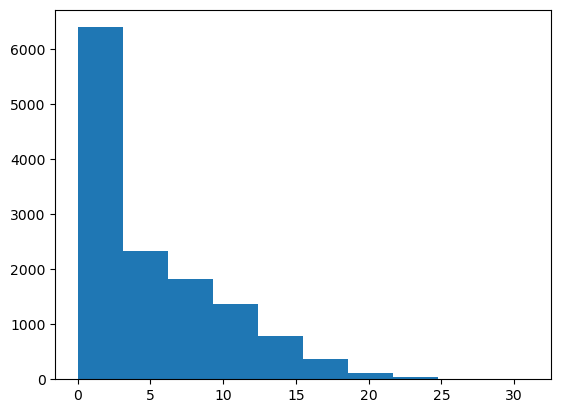

In [193]:
import matplotlib.pyplot as plt

plt.hist(refined_dataframe['careerLength'])
plt.show()

There a variety of methods to determine outliers and different use cases require different methods. You can do this visually or statistically (or a combination of both). For now, looking at this histogram, we can tell nothing is out of the ordinary. If we saw any negative values or extremely high values given the context (a 40 year career), we could do more digging.

### Validate our Data

We have now done some pretty thorough cleaning, manipulation, and feature creation given this problem statement. Let's take one more look at our resulting table before we begin to create visuals.

In [194]:
refined_dataframe.describe()

,birthYear,debutYear,finalGameYear,careerLength
count,13241.000000,13241.000000,13241.000000,13241.000000
mean,1952.132241,1976.517786,1981.643909,5.126123
std,26.724941,26.861697,26.865164,5.002110
min,1900.000000,1884.000000,1892.000000,0.000000
25%,1929.000000,1954.000000,1959.000000,1.000000
50%,1957.000000,1981.000000,1987.000000,4.000000
75%,1975.000000,2000.000000,2006.000000,8.000000
max,1995.000000,2015.000000,2015.000000,31.000000


We can confirm here that all numerical columns have the same amount of records, the minimum birth year is 1900 (a constraint of the problem statement), the maximum birth year is 1995 (so there aren't any unrealistic aged players in the data set), and the average career length is approximately 5 years (given what we know about baseball, this makes sense).

We can do a ton more with this dataset but once again, this is a simple introductory exploration.

## Finish our problem statement with some visualizations

We know that we want to observe the affect of batting hand on career length. So let's illustrate it.

In [204]:
right_handers = refined_dataframe['careerLength'].loc[refined_dataframe['bats'] == 'R']
left_handers = refined_dataframe['careerLength'].loc[refined_dataframe['bats'] == 'L']
switch_hitters = refined_dataframe['careerLength'].loc[refined_dataframe['bats'] == 'B']

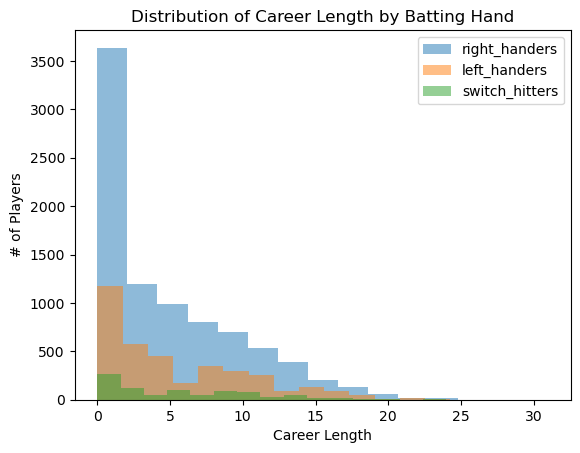

In [213]:
#Histograms 
plt.hist(right_handers, 15, alpha=0.5, label='right_handers')
plt.hist(left_handers, 15, alpha=0.5, label='left_handers')
plt.hist(switch_hitters, 15, alpha=0.5, label='switch_hitters')
plt.legend(loc='upper right')
plt.xlabel("Career Length")
plt.ylabel("# of Players")
plt.title("Distribution of Career Length by Batting Hand")
plt.show()

The total number of players in each group is quite different. But it is at least pretty clear the distributions of career length are similar amongst batting hand groups (skewed right).

Let's create another visualization, but instead of plotting overall total players, let's plot by percentages of a whole! First we need to extract count of occurence for each career length in each data subset!

In [244]:
right_handers_count = right_handers.value_counts()
left_handers_count = left_handers.value_counts()
switch_hitters_count = switch_hitters.value_counts()

Let's display these next to each other and see what we find.

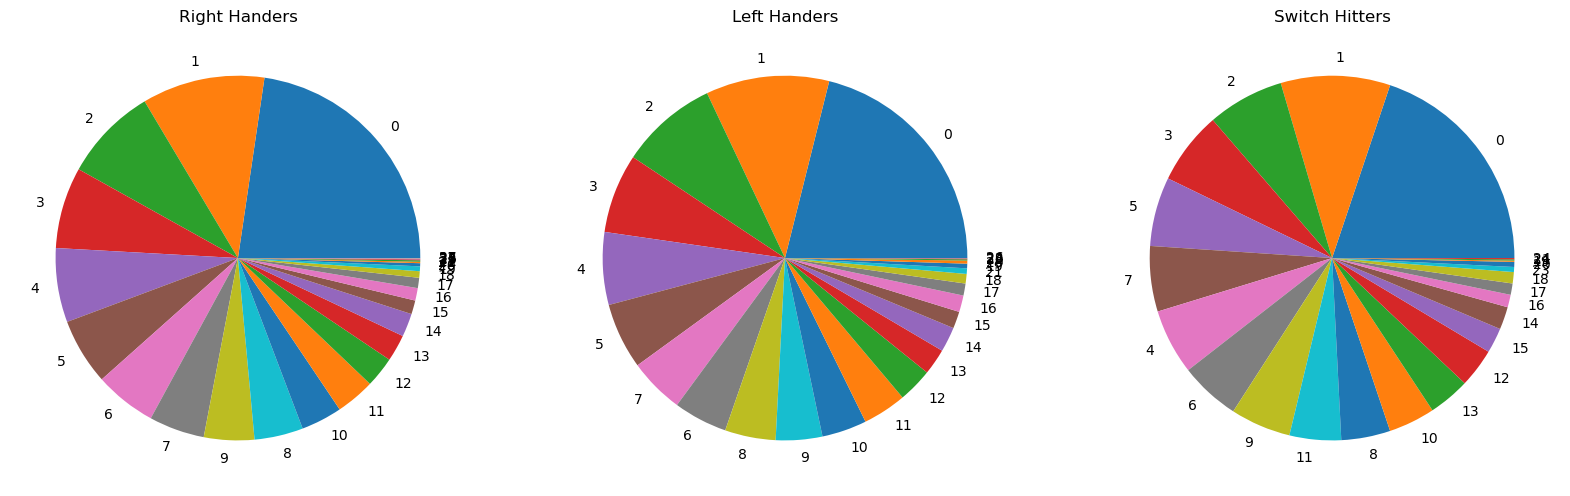

In [250]:
fig = plt.figure(figsize=(20, 8))

plt.subplot(1,3,1)
plt.pie(right_handers_count.values, labels = right_handers_count.index )
plt.title("Right Handers")

plt.subplot(1,3,2)
plt.pie(left_handers_count.values, labels = left_handers_count.index )
plt.title("Left Handers")

plt.subplot(1,3,3)
plt.pie(switch_hitters_count.values, labels = switch_hitters_count.index )
plt.title("Switch Hitters")


plt.show()

These look quite similar as well! Let's move onto to one more visual that might give us some context. We will now calculate average career length by batting hand and plot them against each other.

In [253]:
rh_mean = right_handers.values.mean()
lh_mean = left_handers.values.mean()
sh_mean = switch_hitters.values.mean()

Text(0.5, 1.0, 'Avg. Career Length by Batting Hand')

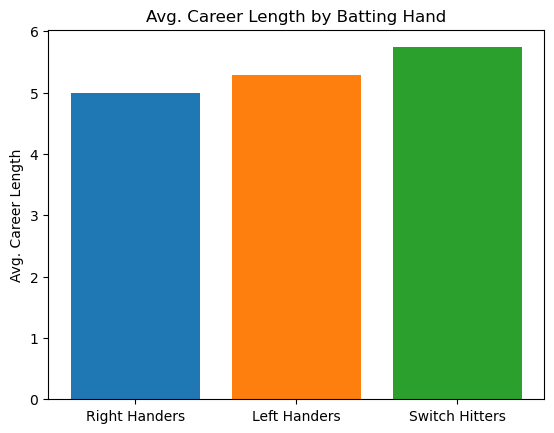

In [258]:
plt.bar("Right Handers",rh_mean)
plt.bar("Left Handers",lh_mean)
plt.bar("Switch Hitters",sh_mean)

plt.ylabel("Avg. Career Length")
plt.title("Avg. Career Length by Batting Hand")

By looking at this bar chart, you can see that switch hitters have the longest average career length, followed by left handers, then right handers.

Further analysis would have to be done to determine statisitcal significance amongst group differences (more on that later), but with our knowledge of baseball we may be able to explain this pattern.

Switch hitters are the most rare and tend to be a little more versatile. Maybe that is why their careers last the longest. Left handed hitters are more rare than right handed hitters and historically hit better against right handed pitchers (which are also more common than left handed pitchers). Another possible factor?

There is so much you can look into with a dataset like this! So many pieces of information to extract, trends to discover, and a lot more! This was an introduction to ingesting a dataset and telling a story with it. This is just the beginning of your Data Science journey and hopefully by now you can see how applicable Data Science is in the world of sports!